# Import Dependencies and Data

In [1]:
!pip install -q tensorflow matplotlib tensorflow-datasets ipywidgets

In [2]:
!pip list

Package                                           Version        Editable project location
------------------------------------------------- -------------- -----------------------------------------------------
absl-py                                           0.12.0
aiobotocore                                       2.2.0
aiohttp                                           3.8.1
aioitertools                                      0.8.0
aiosignal                                         1.2.0
ale-py                                            0.7.4
alembic                                           1.4.1
altair                                            4.2.0
anyio                                             3.4.0
appnope                                           0.1.2
argon2-cffi                                       21.3.0
argon2-cffi-bindings                              21.2.0
asgiref                                           3.4.1
astroid                                           2.7.3
ast

scipy                                             1.5.4
seaborn                                           0.11.2
selenium                                          4.1.0
semver                                            2.13.0
Send2Trash                                        1.8.0
setuptools                                        56.0.0
setuptools-scm                                    6.3.2
SimpleTaxiFare                                    1.0            /Users/elizabeth/code/Elizabeth-kok/TFM_TrainAtScale
six                                               1.14.0
sklearn                                           0.0
smart-open                                        5.2.1
smmap                                             5.0.0
sniffio                                           1.2.0
sortedcontainers                                  2.4.0
soupsieve                                         2.3.1
spacy                                             2.3.7
SQLAlchemy                              

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [4]:
ds= tfds.load("fashion_mnist",split="train")

2022-09-06 13:11:22.272031: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
print(ds.as_numpy_iterator().next().keys()) #['image', 'label']
ds.as_numpy_iterator().next()

dict_keys(['image', 'label'])


2022-09-06 13:11:22.527887: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-09-06 13:11:22.554040: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

# Viz Data and Build Dataset

In [6]:
import numpy as np

In [7]:
detaiterator=ds.as_numpy_iterator()

In [8]:
print(detaiterator.next()["image"].shape) # (28, 28, 1)
detaiterator.next()["image"]

(28, 28, 1)


array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 59],
        [ 77],
        [ 58],
        [ 56],
        [ 58],
        [ 57],
        [ 65],
        [ 89],
        [  2],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [245],
        [213],
        [199],
        [192],
        [188],
        [189],
        [184],
        [226],
        [ 90],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [101],
      

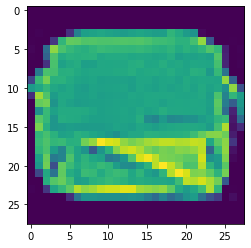

In [9]:
plt.imshow(detaiterator.next()["image"])

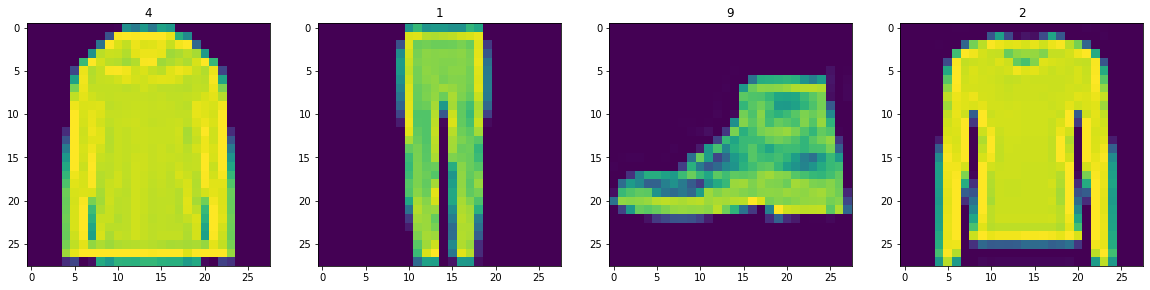

In [10]:
fig, ax= plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample=detaiterator.next()
    ax[idx].imshow(sample["image"])
    ax[idx].title.set_text(sample["label"])

In [11]:
def scale_images(data):
    image=data["image"]
    return image/255

In [12]:
ds=tfds.load("fashion_mnist",split="train")
print(ds)
ds=ds.map(scale_images) #mcshbap
ds=ds.cache()
ds=ds.shuffle(60000)
ds=ds.batch(128) # 128 images per sample
ds=ds.prefetch(64) #reduces the likelihood of bottlenecking

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [13]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Build Neural Network

## Import Modelling Components

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

## Build Generator

In [15]:
def build_sequential():
    
    model= Sequential()

    model.add(Dense(7*7*128,input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding="same"))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128,4,padding="same"))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128,4,padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1,4,padding="same",activation="sigmoid"))
    
    return model

In [16]:
model=build_sequential()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [17]:
generator=build_sequential()
img=generator.predict(np.random.randn(4,128,1))
img.shape

(4, 28, 28, 1)

0 (28, 28, 1)
..................................
1 (28, 28, 1)
..................................
2 (28, 28, 1)
..................................
3 (28, 28, 1)
..................................


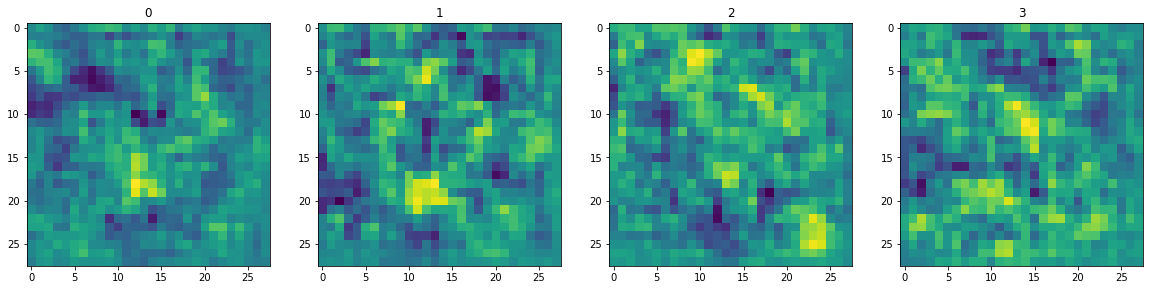

In [18]:
fig, ax= plt.subplots(ncols=4, figsize=(20,20))
for idx,image in enumerate(img):
    print(idx,image.shape)
#     print(image)
    print("..................................")
    
    ax[idx].imshow(image)
    ax[idx].title.set_text(idx)
    
#image outputs should look better once we train it

## Build Discriminator

In [27]:
def build_discriminator():
    model=Sequential()
    
    model.add(Conv2D(32,5,input_shape=(28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    
    return model

In [28]:
discriminator=build_discriminator()
discriminator.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_7 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 128)      

In [30]:
img.shape

(4, 28, 28, 1)

In [34]:
print(discriminator.predict(img))
discriminator.predict(img)>0.5

[[0.51219445]
 [0.5122047 ]
 [0.51253426]
 [0.5122034 ]]


array([[ True],
       [ True],
       [ True],
       [ True]])

In [38]:
# deep neural network expects the first number to be the batch size
# so if we are only predicting one image, we have to use np.expand_dims()
# shape will change from (28,28,1) to (1,28,28,1)
for image in img:
    print (discriminator.predict(np.expand_dims(image,0)))

[[0.51219445]]
[[0.5122047]]
[[0.51253426]]
[[0.5122034]]


# Construct Training Loop

## Setup Losses and Optimizers

In [39]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [40]:
g_opt=Adam(learning_rate=0.001)
d_opt=Adam(learning_rate=0.0001)

g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

## Build Subclassed Model

In [43]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [63]:
print(tf.random.normal((6,2)))
print(".........................................................")
print(tf.ones_like(tf.random.normal((6,2))))
print("..............................................")
print(tf.zeros_like(tf.random.normal((6,2))))
print("..............................................")
print(tf.zeros_like(tf.random.normal((6,2))[4]))
print("..............................................")

tf.Tensor(
[[ 0.7181686  -0.70960253]
 [ 2.0213473  -0.0858737 ]
 [-0.10098053  0.49397248]
 [-0.1499259  -0.56757057]
 [-0.93109256 -0.14229034]
 [-1.0092214  -0.99719095]], shape=(6, 2), dtype=float32)
.........................................................
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]], shape=(6, 2), dtype=float32)
..............................................
tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]], shape=(6, 2), dtype=float32)
..............................................
tf.Tensor([0. 0.], shape=(2,), dtype=float32)
..............................................


In [68]:
0.15*tf.random.uniform((1,128))

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[0.06342305, 0.00920565, 0.1300012 , 0.02708126, 0.02382488,
        0.12513252, 0.13944402, 0.12577516, 0.14488344, 0.011678  ,
        0.0196072 , 0.00927386, 0.02260841, 0.12256728, 0.05726198,
        0.13357906, 0.07813863, 0.05598639, 0.04527401, 0.14655033,
        0.0456292 , 0.08058336, 0.13778909, 0.06632555, 0.05613789,
        0.0464346 , 0.08247489, 0.07631813, 0.02100046, 0.06192582,
        0.01770353, 0.08465517, 0.01860099, 0.02720513, 0.04261363,
        0.06082826, 0.06758495, 0.04844792, 0.09676339, 0.08274329,
        0.07332686, 0.13530439, 0.08181426, 0.02236485, 0.10098771,
        0.08375733, 0.03725161, 0.11638971, 0.10432283, 0.13438983,
        0.07173182, 0.10458699, 0.1363499 , 0.06905222, 0.13934559,
        0.12648447, 0.14605042, 0.05373391, 0.05548314, 0.10293774,
        0.05959073, 0.04415658, 0.0386975 , 0.07151148, 0.07216722,
        0.00213776, 0.03710227, 0.00082278, 0.12065884, 0.06439888

In [44]:
class FashionGAN(Model):
    def __init__(self):
        pass
    def compile(self):
        pass
    def train_step(self):
        pass

In [ ]:
# Subclass model
# - Train the discriminator
# 1. Pass the real and fake images to the discriminator model
# 2. Create labels for real and fake images
# 3. Add some noise to the outputs (prevent learning too fast)
# 4. Calculate the loss
# 5. Apply backpropagation - this allows neural network to learn 



In [72]:
class FashionGAN(Model):
    
    def __init__(self,generator, discriminator, *args, **kwargs):
        super().__init__(*args,**kwargs)
        
        self.generator=generator
        self.discriminator=discriminator    
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        super().compile(*args,**kwargs)
        
        self.g_opt=g_opt
        self.d_opt=d_opt
        self.g_loss=g_loss
        self.d_loss=d_loss
        
    def train_step(self,batch):
        real_images=batch
        fake_images=self.generator(tf.random.normal((128,128,1)),training= False)
        
        with tf.GradientTape() as d_tape:
            yhat_real= self.discriminator(real_images, training=True)
            yhat_fake= self.discriminator(fake_images, training=False)
            yhat_realfake=tf.concat([yhat_real,yhat_fake],axis=0)
            
            #128 zeros and 128 ones 
            yhat_realfake=tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)

            #adding noise to the TRUE outputs
            noise_real=0.15*tf.random.uniform(tf.shape(yhat_real)) #128 diff outputs
            noise_fake=-0.15*tf.random.uniform(tf,shape(yhat_fake)) # 128 diff outputs
            y_realfake+=tf.concat([noise_real,noise_fake],axis=0) # adding the outputs generated back to the original y_realfake
            
            #calculating loss
            total_d_loss=self.d_loss(y_realfake, yhat_realfake)
        
        #apply backpropagation 
        dgrad= d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))
        
        with tf.GradientTape() as g_tape:
            gen_images=self.generator(tf.random.normal((128,128,1)),training=True)
            predicted_labels=self.discriminator(gen_images, training=False)
            total_g_loss=self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)
        
                #apply backpropagation 
        ggrad= g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}
 

In [73]:
# create instance of subclass model
fashgan= FashionGAN(generator, discriminator)

In [75]:
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

## Build Callback

In [76]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [77]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

## Train